In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from category_encoders.leave_one_out import LeaveOneOutEncoder
pd.set_option('future.no_silent_downcasting', True)


In [187]:
data = pd.read_csv('crx.data', names=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16'], delimiter=',', na_values='?')
data = data.dropna()
data['A16'] = data['A16'].replace('+', 1)
data['A16'] = data['A16'].replace('-', 0)
data['A16'] = data['A16'].astype('int8')
enc = LeaveOneOutEncoder(cols=data[['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']])
data = enc.fit_transform(data, data['A16'])
data.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,0.445434,30.83,0.000,0.497992,0.497992,0.516129,0.426316,1.250,0.795977,0.706294,1,0.428571,0.467337,202.0,0,1
1,0.465347,58.67,4.460,0.497992,0.497992,0.648649,0.632353,3.040,0.795977,0.706294,6,0.428571,0.467337,43.0,560,1
2,0.465347,24.50,0.500,0.497992,0.497992,0.648649,0.632353,1.500,0.795977,0.252055,0,0.428571,0.467337,280.0,824,1
3,0.445434,27.83,1.540,0.497992,0.497992,0.516129,0.426316,3.750,0.795977,0.706294,5,0.478405,0.467337,100.0,3,1
4,0.445434,20.17,5.625,0.497992,0.497992,0.516129,0.426316,1.710,0.795977,0.252055,0,0.428571,0.269231,120.0,0,1
5,0.445434,32.08,4.000,0.497992,0.497992,0.405405,0.426316,2.500,0.795977,0.252055,0,0.478405,0.467337,360.0,0,1
6,0.445434,33.17,1.040,0.497992,0.497992,0.500000,0.632353,6.500,0.795977,0.252055,0,0.478405,0.467337,164.0,31285,1
7,0.465347,22.92,11.585,0.497992,0.497992,0.717949,0.426316,0.040,0.795977,0.252055,0,0.428571,0.467337,80.0,1349,1
8,0.445434,54.42,0.500,0.291391,0.291391,0.255319,0.632353,3.960,0.795977,0.252055,0,0.428571,0.467337,180.0,314,1
9,0.445434,42.50,4.915,0.291391,0.291391,0.516129,0.426316,3.165,0.795977,0.252055,0,0.478405,0.467337,52.0,1442,1


**Знайшов нани та видалив, замінив таргет на числові значення, заенкодив категоріальні фічі.**

In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      653 non-null    float64
 1   A2      653 non-null    float64
 2   A3      653 non-null    float64
 3   A4      653 non-null    float64
 4   A5      653 non-null    float64
 5   A6      653 non-null    float64
 6   A7      653 non-null    float64
 7   A8      653 non-null    float64
 8   A9      653 non-null    float64
 9   A10     653 non-null    float64
 10  A11     653 non-null    int64  
 11  A12     653 non-null    float64
 12  A13     653 non-null    float64
 13  A14     653 non-null    float64
 14  A15     653 non-null    int64  
 15  A16     653 non-null    int8   
dtypes: float64(13), int64(2), int8(1)
memory usage: 82.3 KB


<Axes: >

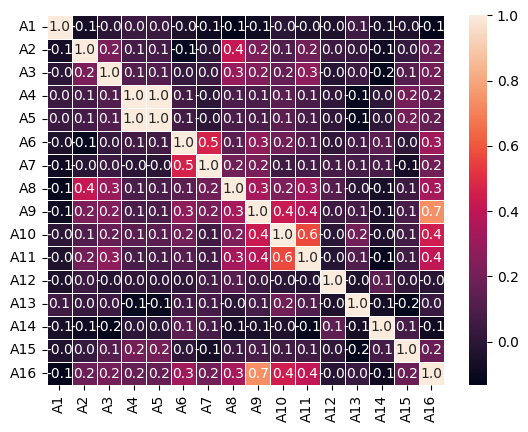

In [189]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, linewidth=.5, robust=True, fmt=".1f")

**A5 and A4 have strong correlation. We need to remove one of them**

In [190]:
data = data.drop(columns='A5')

<Axes: >

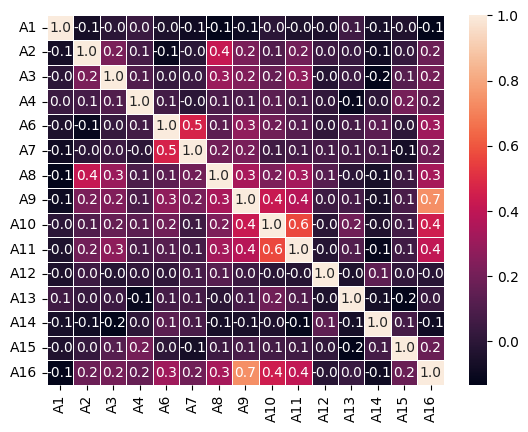

In [191]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, linewidth=.5, robust=True, fmt=".1f")

**Тепер все гаразд кореляцій немає**

In [192]:
scaler = MinMaxScaler()
data_sc = scaler.fit_transform(data.drop(columns=['A16']))
X_train, X_test, y_train, y_test = train_test_split(data_sc, data.A16, train_size=.66, random_state=17, shuffle=True)

**Застосував мінмакс скалер щоб вирівняти значення на діапазон 0-1, розділив на тестову та тренувальну частину дані**

In [200]:
clf = DecisionTreeClassifier(random_state=42, max_depth=6).fit(X_train,y_train)
cv_sc = cross_val_score(clf, X_train, y_train, cv=4)
print(f"Cross-Validation Scores: {cv_sc}")

Cross-Validation Scores: [1.         0.99074074 0.97196262 0.97196262]


**Дані доволі збалансовані, глибину підібрав експерименальним шляхом**

[Text(0.7, 0.9166666666666666, 'x[11] <= 0.468\ngini = 0.494\nsamples = 430\nvalue = [239.0, 191.0]'),
 Text(0.6, 0.75, 'x[3] <= 0.293\ngini = 0.211\nsamples = 217\nvalue = [26, 191]'),
 Text(0.6499999999999999, 0.8333333333333333, 'True  '),
 Text(0.4, 0.5833333333333334, 'x[10] <= 0.969\ngini = 0.041\nsamples = 193\nvalue = [4, 189]'),
 Text(0.3, 0.4166666666666667, 'x[11] <= 0.378\ngini = 0.01\nsamples = 190\nvalue = [1, 189]'),
 Text(0.2, 0.25, 'x[11] <= 0.279\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 180\nvalue = [0, 180]'),
 Text(0.5, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.5833333333333334, 'x[8] <= 0.003\ngini = 0.153\nsamples = 24\nvalue = [22, 2]'),
 Text(0.7, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.9, 0.41666666666

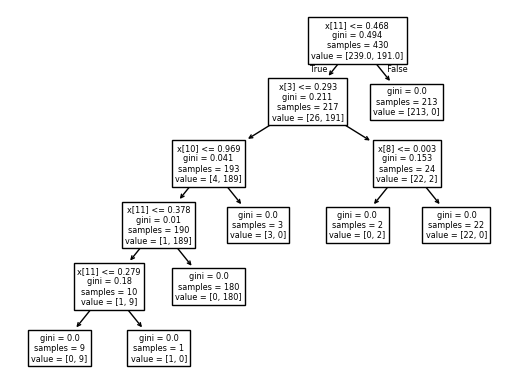

In [201]:
tree.plot_tree(clf)

**Алгоритм дерева, в кінці видно, що всі класи чітко розподілилися**

In [202]:
clf.fit(X_train, y_train)

print(f'Train Score: {clf.score(X_train, y_train)}')
print(f'Test Score: {clf.score(X_test, y_test)}')

Train Score: 1.0
Test Score: 1.0


In [203]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=[f'class_{i}' for i in range(2)]))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00       118
     class_1       1.00      1.00      1.00       105

    accuracy                           1.00       223
   macro avg       1.00      1.00      1.00       223
weighted avg       1.00      1.00      1.00       223



**Бачимо, що модель ідеально натренована на тренувальних та тестових даних, 100% правильних відповідей**

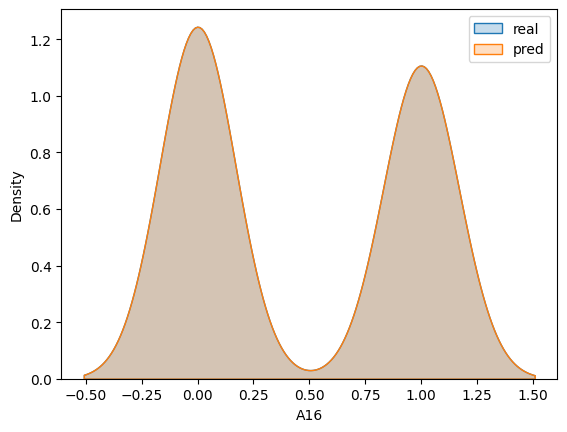

In [204]:
sns.kdeplot(y_test, fill=True, label='real')
sns.kdeplot(clf.predict(X_test), fill=True, label='pred')
plt.legend()

**Графік ще раз доказує правильність моделі**

**За підсумками побудови ще двох моделей: логістичної регресії та kNN класифікації дерево виявилось найкраще натренованим з найвищими метриками**